#### Required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 

Comme son nom l'indique, enfin non, pas vraiment, le module **pickle** permet de sauvegarder dans un fichier, au format binaire,  n'importe quel objet Python.

En clair, si pour une raison quelconque, dans un script Python, vous avez besoin de sauvegarder, temporairement ou même de façon plus pérenne, le contenu d'un objet Python comme une liste, un dictionnaire, un tuple etc etc ... au lieu d'utiliser une base de données ou un simple fichier texte, le module pickle est fait pour ça.

Il permet de stocker et de restaurer un objet Python tel quel sans aucune manipulation supplémentaire.

#### importation du dataset

In [2]:
df_train=pd.read_csv('train_u6lujuX_CVtuZ9i.csv', header=0)

In [3]:
df_train.shape

(614, 13)

In [4]:
df_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Dictionnaire de données
* **Loan_ID** : code du credit
* **Gender** : Genre du client
* **Married** : Civilité
* **Dependents** : Nombre d'enfants
* **Education** : Diplômé ou pas
* **Self_Employed** : Travail pour son compte ou pas
* **ApplicantIncome** : Revenu
* **CoapplicantIncome** : Revenu du conjoint
* **LoanAmount** : Valeur du credit
* **Loan_Amount_Term** : Terme du credit
* **Credit_History** : Est-ce que le client a déjà contracté un credit
* **Property_Area** : habite en milieu urbain ou rural ou semiurbain
* **Loan_Status** : Credit accepté ou pas

### 1- Data Preprocessing

##### Affichage de toute la base de données

In [5]:
pd.set_option('display.max_rows',df_train.shape[0]+1)

In [6]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


#### Désactivons cette option


In [7]:
pd.set_option('display.max_rows',20)

In [8]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### informations sur la structure du dataset

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Vérification des valeurs manquantes

In [10]:
df_train.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

On a trop de valeurs manquantes on ne peut donc pas les supprimer

#### Vérification des données anormales

In [11]:
df_train.describe(include='O') # include='O' pour les variables qualitatives

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002792,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Credit History doit être catégorique

In [12]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
# df_train['Credit_History']=df_train['Credit_History'].apply(np.int64)


In [14]:
df_train['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

## Traitement des NAN
on a plusieurs techniques pour gérer les valeurs manquantes
1. **SUPPRIMER Les lignes correspondantes** si leur nombre est raisonnable
2. **Remplacer Les NAN par des 0** selon la situation
3. **Remplacer soit par la moyenne ou la médiane**
4. **Compléter les NAN par interpolation** lorsque le GAP n'est pas élevé sinon on risque de biaisé notre analyse
5. **Par regression lorsque il existe une relation linéaire poly expo.. entre les colonnes**
6. **Remplacer les NAN par la modalité la plus fréquente** pour la var qualitatives
7. **Remplacer les NAN par la valeur voisine** par KNN par exemple
8. **completer par arbre de décision**

In [15]:
# votons si le point 5 est applicable
df_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


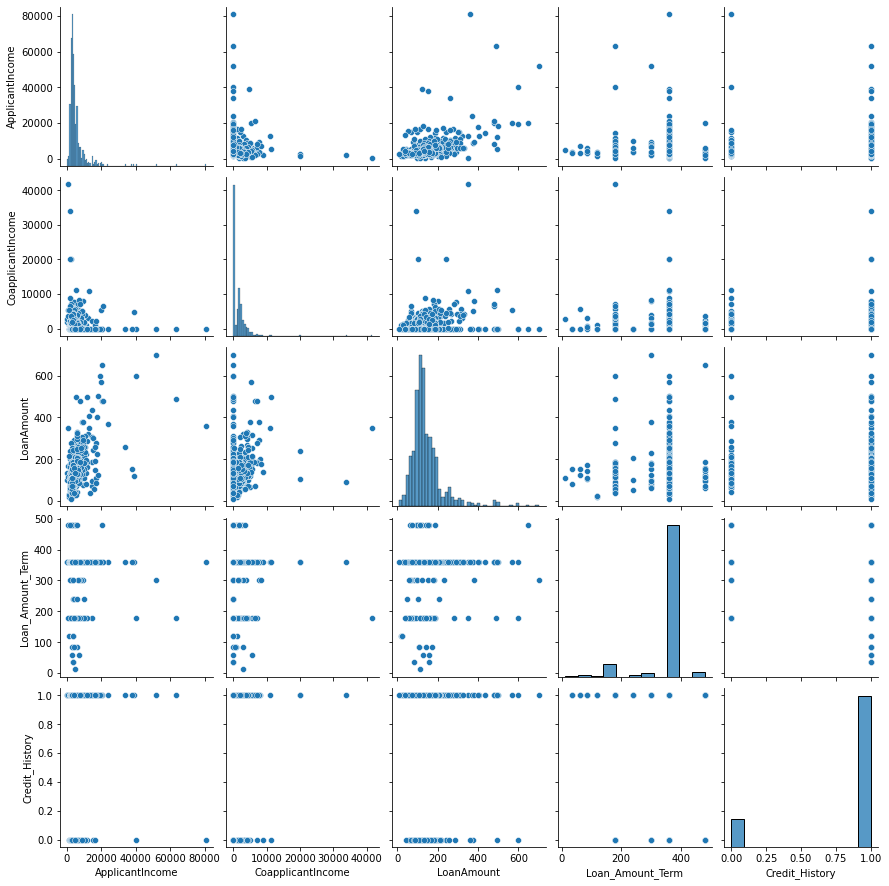

In [16]:
sns.pairplot(df_train)

#### Découpons notre dataset en deux (données numériques et qualitatives)

In [17]:
cat_data=[]
num_data=[]
for i,c in enumerate(df_train.dtypes):
    if c==object:
        cat_data.append(df_train.iloc[:,i])
    else:
        num_data.append(df_train.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [18]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [19]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


#### cat_data: on va remplacer les valeurs manquantes par la modalité la plus fréquente

In [20]:
cat_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [21]:
cat_data['Married'].value_counts().index[0]

'Yes'

In [22]:
cat_data=cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [23]:
cat_data.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [24]:
cat_data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP002792,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


#### num_data: on remplace NAN par la valeur précédente de la même colonne

In [25]:
num_data.fillna(method='bfill',inplace=True)

In [26]:
num_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [27]:
num_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.00000
mean,5403.459283,1621.245798,146.416938,342.410423,0.84202
std,6109.041673,2926.248369,84.917398,64.428629,0.36502
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2877.500000,0.000000,100.000000,360.000000,1.00000
50%,3812.500000,1188.500000,128.000000,360.000000,1.00000
75%,5795.000000,2297.250000,166.750000,360.000000,1.00000
max,81000.000000,41667.000000,700.000000,480.000000,1.00000


### Adaptation des données pour l'implémentation du modèle

In [28]:
target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)

In [29]:
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [30]:
# pour les autres colonnes on utilisera:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
# transforme les catégories en des 0,1,2... Important pour la suite de savoir le 1 est mis pour quelle catégorie, le 0 aussi...
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])

In [33]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [34]:
# La colonne Loan_ID est inutile pour la suite
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [35]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,1,3,0,0,0
611,1,1,1,0,0,2
612,1,1,2,0,0,2


#### on va concaténer maintenant les données qual et quanti

In [36]:
X=pd.concat([cat_data,num_data],axis=1)
y=target

In [37]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


## 2- Analyse Exploratoire: comprendre la base

#### la variable target d'abord: Loan Status

In [38]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

 le pourcentage des crédits accordés est : 0.6872964169381107 
 le pourcentage des crédits non accordés est : 0.3127035830618892 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


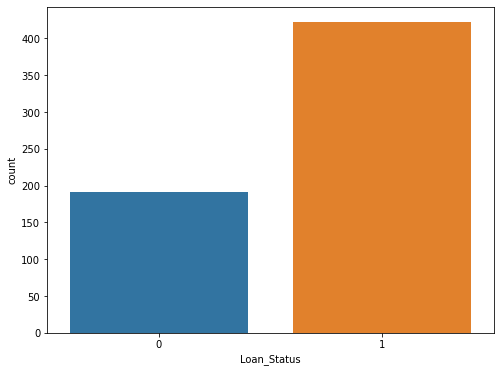

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(y)
Yes=y.value_counts()[1]/len(y)
No=y.value_counts()[0]/len(y)
print(f' le pourcentage des crédits accordés est : {Yes} ')
print(f' le pourcentage des crédits non accordés est : {No} ')

#### Credit_History impact on Loan_Status

In [40]:
df=pd.concat([cat_data,num_data,target],axis=1)

In [41]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


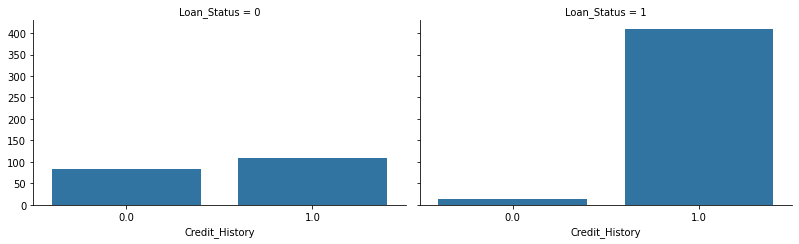

In [42]:
grid=sns.FacetGrid(df,col='Loan_Status',size=3.5, aspect=1.6)
grid.map(sns.countplot,'Credit_History')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


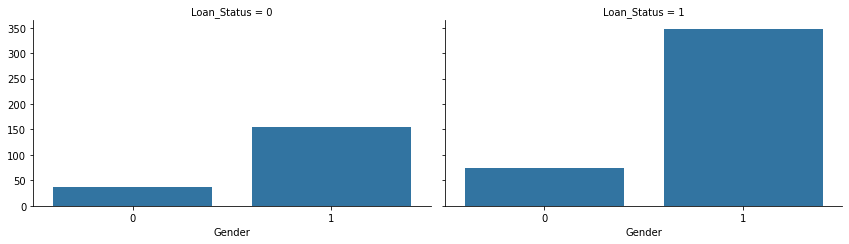

In [43]:
grid=sns.FacetGrid(df,col='Loan_Status',size=3.5, aspect=1.7)
grid.map(sns.countplot,'Gender')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


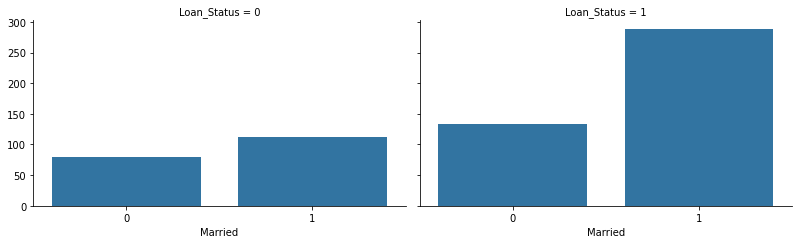

In [44]:
grid=sns.FacetGrid(df,col='Loan_Status',size=3.5, aspect=1.6)
grid.map(sns.countplot,'Married')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


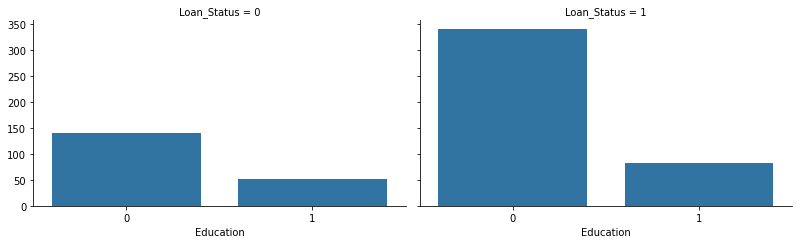

In [45]:
grid=sns.FacetGrid(df,col='Loan_Status',size=3.5, aspect=1.6)
grid.map(sns.countplot,'Education')

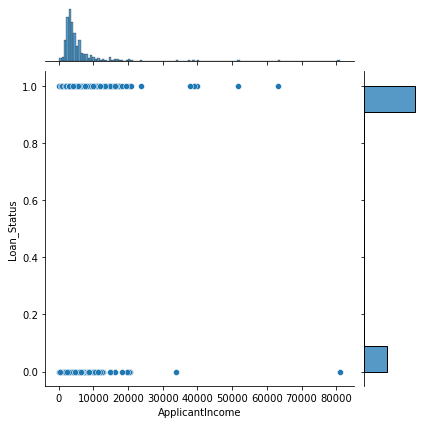

In [46]:
#### revenu vs loan_status
sns.jointplot(x='ApplicantIncome',y='Loan_Status', data=df)

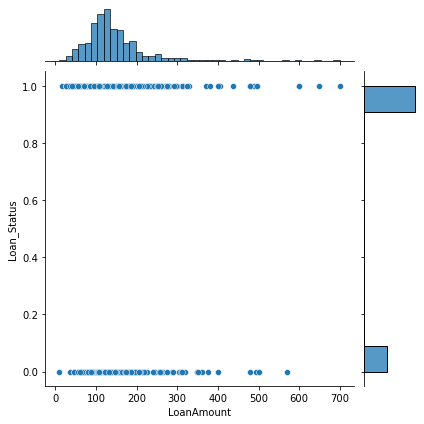

In [47]:
sns.jointplot(x='LoanAmount',y='Loan_Status', data=df)

In [48]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1,1,0,0,0,1,3833.5,268.0,132.5,360.0,1.0
1,1,1,0,0,0,1,3812.5,1239.5,127.5,360.0,1.0


In [49]:
df.groupby('Loan_Status').sum()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,155,113,140,52,26,192,1045647.0,360539.000000,29075.0,66156.0,108.0
1,347,288,317,82,56,445,2272077.0,634905.919989,60825.0,144084.0,409.0


## 3- Realisation du Model

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit

In [51]:
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [52]:
for train, test in sss.split(X,y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

In [53]:
X_train.shape

(491, 11)

In [54]:
X_test.shape

(123, 11)

In [55]:
y_train.shape

(491,)

In [56]:
y_test.shape

(123,)

### Regression Logistic

In [57]:
from sklearn.linear_model import LogisticRegression

### KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
from sklearn.metrics import accuracy_score

In [66]:
Models={
    'LogisticRegression' : LogisticRegression(max_iter=1000),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth=3)
}

In [67]:
# foncion de precision
def accu(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'la précision du modele est: {acc}')

In [68]:
# fittin models fonction
def train_test_eval(models,X_train,y_train,X_test,y_test):
    for name, model in models.items():
        print(name, ':')
        model.fit(X_train,y_train)
        accu(y_test,model.predict(X_test))
        print('_'*30)

In [69]:
train_test_eval(Models,X_train,y_train,X_test,y_test)

LogisticRegression :
la précision du modele est: 0.8536585365853658
______________________________
KNeighborsClassifier :
la précision du modele est: 0.6504065040650406
______________________________
DecisionTreeClassifier :
la précision du modele est: 0.8373983739837398
______________________________


### Modèle retenu: Regression Logistique

In [70]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

Gendre: Male: 1, Female: 0             

Married: Yes: 1, No: 0

Dependents: 0:0, 1:1, 2:2, +3:3        

Education: Not Graduated: 1,  Graduated: 0

Self_Employed: Yes: 1, No: 0           

Property_Area: Urbain: 2, Semiurban: 1, Rural: 0

Credit_History: Y:1 No: 0


In [76]:
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X,y)

LogisticRegression(max_iter=1000)

### Enregistrer le Model

In [79]:
pickle.dump(classifier,open('model.pkl','wb'))